In [69]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns',30)
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import pickle

In [2]:
df=pd.read_csv(r"C:\YUG SAVLA\Coding\DJS_COMPUTE\Task_2\automobile_data.csv")
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [3]:
df1=df.copy()
df1.drop(columns=['symboling','normalized-losses'],inplace=True)
df1

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.4,23.0,106,4800,26,27,22470


In [5]:
df1.isnull().sum()

make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    object 
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num-of-doors       205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    object 
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               205 non

In [11]:
df1['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [7]:
# nominal_columns = ['fuel-type']
# df1 = pd.get_dummies(df1, columns=nominal_columns)
# df1

In [8]:
le_make=LabelEncoder()
df1['make']=le_make.fit_transform(df['make'])
make_mapping = dict(zip(le_make.classes_, le_make.transform(le_make.classes_)))
make_mapping

{'alfa-romero': 0,
 'audi': 1,
 'bmw': 2,
 'chevrolet': 3,
 'dodge': 4,
 'honda': 5,
 'isuzu': 6,
 'jaguar': 7,
 'mazda': 8,
 'mercedes-benz': 9,
 'mercury': 10,
 'mitsubishi': 11,
 'nissan': 12,
 'peugot': 13,
 'plymouth': 14,
 'porsche': 15,
 'renault': 16,
 'saab': 17,
 'subaru': 18,
 'toyota': 19,
 'volkswagen': 20,
 'volvo': 21}

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    int32  
 1   fuel-type          205 non-null    object 
 2   aspiration         205 non-null    object 
 3   num-of-doors       205 non-null    object 
 4   body-style         205 non-null    object 
 5   drive-wheels       205 non-null    object 
 6   engine-location    205 non-null    object 
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    object 
 13  num-of-cylinders   205 non-null    object 
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    object 
 16  bore               205 non

In [10]:
# List of columns to encode
columns_to_encode = [
    'aspiration', 
    'num-of-doors', 
    'body-style', 
    'drive-wheels', 
    'engine-location', 
    'engine-type', 
    'num-of-cylinders', 
    'fuel-system', 
    'bore', 
    'stroke',
    'fuel-type'
]

# Loop through the columns and apply LabelEncoder
for column in columns_to_encode:
    le = LabelEncoder()
    df1[column] = le.fit_transform(df[column])


In [11]:
df1

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,111,5000,21,27,13495
1,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,111,5000,21,27,16500
2,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,1,27,9.0,154,5000,19,26,16500
3,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,13,24,10.0,102,5500,24,30,13950
4,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,13,24,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,35,15,9.5,114,5400,23,28,16845
201,21,1,1,1,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,35,15,8.7,160,5300,19,25,19045
202,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,26,7,8.8,134,5500,18,23,21485
203,21,0,1,1,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,6,24,23.0,106,4800,26,27,22470


In [12]:
df1.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width',
       'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    int32  
 1   fuel-type          205 non-null    int32  
 2   aspiration         205 non-null    int32  
 3   num-of-doors       205 non-null    int32  
 4   body-style         205 non-null    int32  
 5   drive-wheels       205 non-null    int32  
 6   engine-location    205 non-null    int32  
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    int32  
 13  num-of-cylinders   205 non-null    int32  
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    int32  
 16  bore               205 non

In [14]:
df1['horsepower'] = pd.to_numeric(df1['horsepower'].replace('?', np.nan), errors='coerce')
df1['peak-rpm'] = pd.to_numeric(df1['peak-rpm'].replace('?', np.nan), errors='coerce')
df1['price'] = pd.to_numeric(df1['price'].replace('?', np.nan), errors='coerce')

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    int32  
 1   fuel-type          205 non-null    int32  
 2   aspiration         205 non-null    int32  
 3   num-of-doors       205 non-null    int32  
 4   body-style         205 non-null    int32  
 5   drive-wheels       205 non-null    int32  
 6   engine-location    205 non-null    int32  
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    int32  
 13  num-of-cylinders   205 non-null    int32  
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    int32  
 16  bore               205 non

In [16]:
df1

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,111.0,5000.0,21,27,13495.0
1,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,111.0,5000.0,21,27,16500.0
2,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,1,27,9.0,154.0,5000.0,19,26,16500.0
3,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,13,24,10.0,102.0,5500.0,24,30,13950.0
4,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,13,24,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,35,15,9.5,114.0,5400.0,23,28,16845.0
201,21,1,1,1,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,35,15,8.7,160.0,5300.0,19,25,19045.0
202,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,26,7,8.8,134.0,5500.0,18,23,21485.0
203,21,0,1,1,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,6,24,23.0,106.0,4800.0,26,27,22470.0


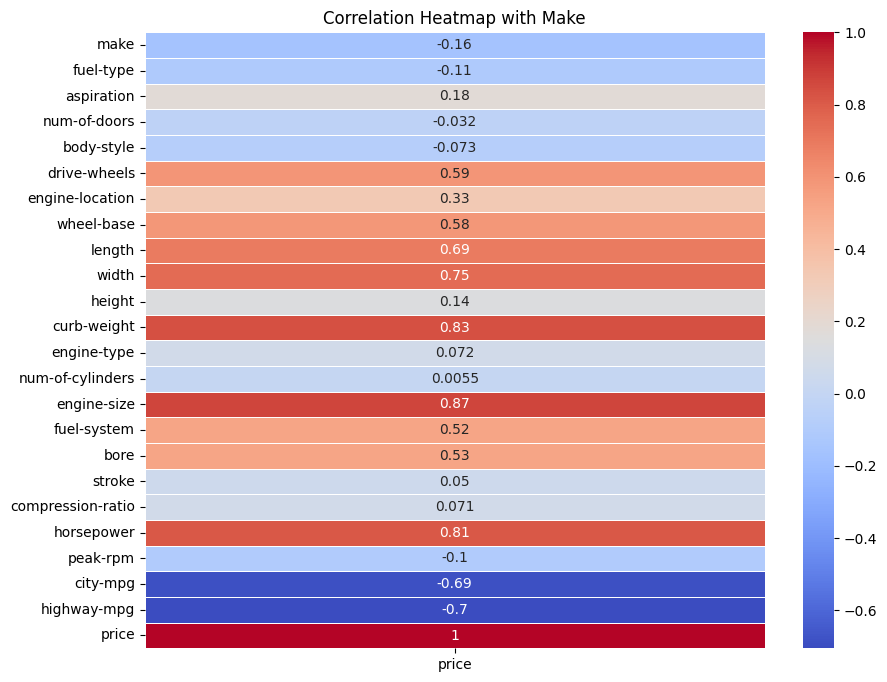

In [17]:


# Calculate correlation matrix
correlation_matrix = df1.corr(numeric_only=True)
make_corr = correlation_matrix[['price']]

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(make_corr, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Heatmap with Make')
plt.show()

In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   make               205 non-null    int32  
 1   fuel-type          205 non-null    int32  
 2   aspiration         205 non-null    int32  
 3   num-of-doors       205 non-null    int32  
 4   body-style         205 non-null    int32  
 5   drive-wheels       205 non-null    int32  
 6   engine-location    205 non-null    int32  
 7   wheel-base         205 non-null    float64
 8   length             205 non-null    float64
 9   width              205 non-null    float64
 10  height             205 non-null    float64
 11  curb-weight        205 non-null    int64  
 12  engine-type        205 non-null    int32  
 13  num-of-cylinders   205 non-null    int32  
 14  engine-size        205 non-null    int64  
 15  fuel-system        205 non-null    int32  
 16  bore               205 non

In [19]:
df1

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,111.0,5000.0,21,27,13495.0
1,0,1,0,2,0,2,0,88.6,168.8,64.1,48.8,2548,0,2,130,5,23,4,9.0,111.0,5000.0,21,27,16500.0
2,0,1,0,2,2,2,0,94.5,171.2,65.5,52.4,2823,5,3,152,5,1,27,9.0,154.0,5000.0,19,26,16500.0
3,1,1,0,1,3,1,0,99.8,176.6,66.2,54.3,2337,3,2,109,5,13,24,10.0,102.0,5500.0,24,30,13950.0
4,1,1,0,1,3,0,0,99.4,176.6,66.4,54.3,2824,3,1,136,5,13,24,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,2952,3,2,141,5,35,15,9.5,114.0,5400.0,23,28,16845.0
201,21,1,1,1,3,2,0,109.1,188.8,68.8,55.5,3049,3,2,141,5,35,15,8.7,160.0,5300.0,19,25,19045.0
202,21,1,0,1,3,2,0,109.1,188.8,68.9,55.5,3012,5,3,173,5,26,7,8.8,134.0,5500.0,18,23,21485.0
203,21,0,1,1,3,2,0,109.1,188.8,68.9,55.5,3217,3,3,145,3,6,24,23.0,106.0,4800.0,26,27,22470.0


In [20]:
df1.fillna(0,inplace=True)

In [21]:
feature_columns = df1.columns[df1.columns != 'price'] # all columns that are not Risk_Category
target_column = 'price'

In [22]:
X = df1[feature_columns]
y = df1[target_column]

In [23]:
 scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.94825569,  0.32879797, -0.46929532, ..., -0.10876019,
        -0.64655303, -0.54605874],
       [-1.94825569,  0.32879797, -0.46929532, ..., -0.10876019,
        -0.64655303, -0.54605874],
       [-1.94825569,  0.32879797, -0.46929532, ..., -0.10876019,
        -0.95301169, -0.69162706],
       ...,
       [ 1.40664061,  0.32879797, -0.46929532, ...,  0.61278798,
        -1.10624102, -1.12833203],
       [ 1.40664061, -3.04138127,  2.13085442, ..., -0.39737946,
         0.11959362, -0.54605874],
       [ 1.40664061,  0.32879797,  2.13085442, ...,  0.46847835,
        -0.95301169, -0.83719538]])

In [28]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [60]:
pca = PCA(n_components=0.95)  # Retain 95% of the variance


In [61]:
X_pca = pca.fit_transform(X_scaled)
# X_pca

In [62]:
pca.explained_variance_

array([7.58971063, 3.69104469, 2.06072484, 1.45473887, 1.3092584 ,
       1.10178431, 1.02416529, 0.98871802, 0.69874954, 0.56371831,
       0.51157205, 0.42220757, 0.39529744, 0.31905155])

Text(0, 0.5, 'Second Principal Component')

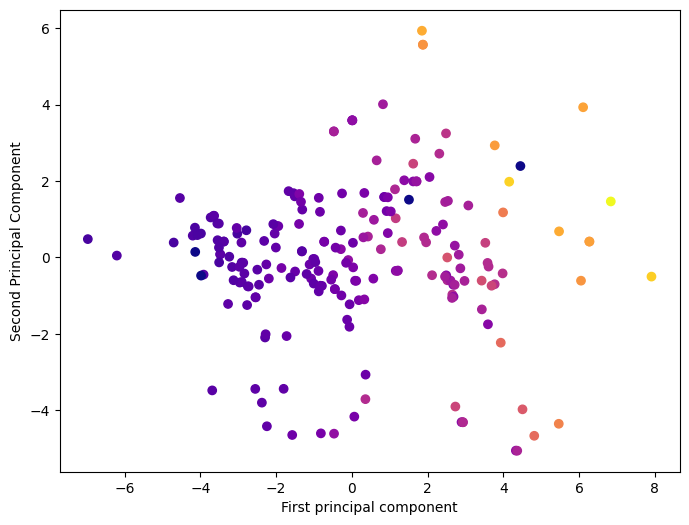

In [63]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=df1[target_column],cmap='plasma')
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')

In [64]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

# Fit a linear regression model
model = LinearRegression()
mse=cross_val_score(model,X_train,y_train,scoring='neg_mean_squared_error',cv=10)
model.fit(X_train, y_train)
# # Predict on the test set 

# # Evaluate the model
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')

LinearRegression()

In [71]:
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [65]:
np.mean(mse)

-18747518.198437437

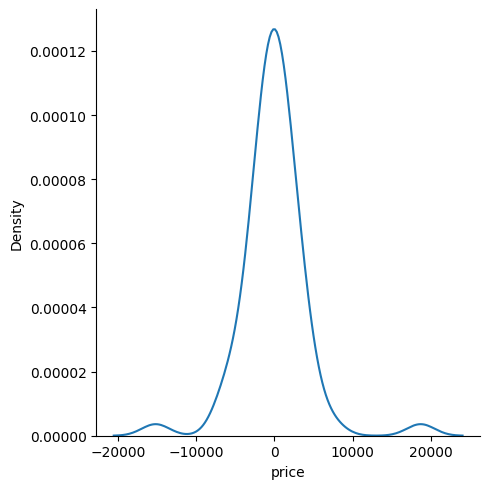

In [66]:
reg_pred=model.predict(X_test)
sns.displot(reg_pred-y_test,kind='kde')


In [67]:
score=r2_score(reg_pred,y_test)
score

0.7115652307650722